In [1]:
import pandas as pd
import jieba
import jieba.analyse
from sklearn.decomposition import PCA

In [2]:
import zh_core_web_sm
nlp = zh_core_web_sm.load()

In [3]:
df=pd.read_json('./categ.json',lines=True)
df.head()

,書名,書籍網站,作者,出版社,ISBN,圖片網址,書籍簡介,類別
0,瞄過一眼就忘不了的世界史：高中老師╳神級YouTuber 2，000萬次點閱的超人氣課程,https://www.kingstone.com.tw//basic/2017110045...,山崎圭一,野人文化,9789863844433,https://cdn.kingstone.com.tw/book/images/produ...,"高中老師╳神級YouTuber╳最強「圖像記憶法」★2,000萬次點閱的超人氣課程！★狂銷3...",文化
1,大戰略：耶魯大學長紅20年大師課程，從歷史提煉的領導決策心法,https://www.kingstone.com.tw//basic/2015410301...,約翰．路易斯．蓋迪斯,聯經,9789570856712,https://cdn.kingstone.com.tw/book/images/produ...,金石堂強力推薦書 !★耶魯大學長紅20年的戰略大師課★★投資銀行摩根大通必讀清單★★Amaz...,文化
2,歷史學的探究與實作操作手冊,https://www.kingstone.com.tw//basic/2015240255...,陳建守、韓承樺、張育甄、萬雅筑,臺灣商務,9789570533446,https://cdn.kingstone.com.tw/book/images/produ...,108課綱歷史科目「探究與實作」課程規劃設計參考指南！一次解決 主題設定、課程活動、參考書目...,文化
3,忘了自己是動物的人類：重思生命起源的歷史與身而為人的意義,https://www.kingstone.com.tw//basic/2011730257...,梅蘭妮．查林傑,商周出版,9789864779376,https://cdn.kingstone.com.tw/book/images/produ...,最優美的生命起源敘事，重思人類身為動物的美麗與哀愁英、美、加、德、義、荷、葡、俄、西、台灣十...,運動
4,西方憑什麼：五萬年人類大歷史，破解中國落後之謎,https://www.kingstone.com.tw//basic/2017130022...,伊安．摩里士,雅言文化,9789868271272,https://cdn.kingstone.com.tw/book/images/produ...,美國筆會書獎、德國GetAbstract國際財經書獎 美國、英國、中國、德國暢銷書 書開頭...,宗教


In [4]:
df['words'] = df['書名']+'，' + df['書籍簡介']

In [5]:
del df['書籍網站'],df['作者'],df['出版社'],df['圖片網址'],df['書籍簡介'],df['類別']

In [6]:
stop_words_list=[]
with open(file='./stop_words.txt',mode='r', encoding="UTF-8") as file:
    for line in file:
        line = line.strip()
        stop_words_list.append(line)

In [7]:
stop_words='|'.join(stop_words_list)

In [8]:
kill1='[^\w\s]+'

In [9]:
df['words']=df.words.str.replace(stop_words,'')

C:\Users\Tibame\AppData\Local\Temp/ipykernel_12404/92872001.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['words']=df.words.str.replace(stop_words,'')


In [10]:
kill1='[^\w\s]+'
df['words']=df.words.str.replace(kill1,'')

C:\Users\Tibame\AppData\Local\Temp/ipykernel_12404/2591340210.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['words']=df.words.str.replace(kill1,'')


In [11]:
df.head()

,書名,ISBN,words
0,瞄過一眼就忘不了的世界史：高中老師╳神級YouTuber 2，000萬次點閱的超人氣課程,9789863844433,瞄過一眼忘不世界史高中老師神級YouTur 2000萬次點閱超人氣課程高中老師神級YouTu...
1,大戰略：耶魯大學長紅20年大師課程，從歷史提煉的領導決策心法,9789570856712,大戰略耶魯大學長紅20年大師課程從歷史提煉領導決策心法金石堂強力推薦書 耶魯大學長紅20年戰...
2,歷史學的探究與實作操作手冊,9789570533446,歷史學探究實作操作手冊108課綱歷史科目探究實作課程規劃設計參考指南一次解決 主題設定課程活...
3,忘了自己是動物的人類：重思生命起源的歷史與身而為人的意義,9789864779376,忘自己動物人類重思生命起源歷史身為人意義最優美生命起源敘事重思人類身為動物美麗哀愁英美加德義...
4,西方憑什麼：五萬年人類大歷史，破解中國落後之謎,9789868271272,西方憑什麼五萬年人類大歷史破解中國落後之謎 美國筆會書獎德國GetAbstract國際財經書...


In [12]:
jieba.set_dictionary('./dict.txt.big')

In [13]:
df_1=df.iloc[:500,:]

In [14]:
def cut_word(word):
    cw=jieba.cut(word)
    result=' '.join(cw)
    tags=jieba.analyse.extract_tags(result,topK=10,allowPOS=('n','ns','nz'))
    return ','.join(tags)
df_1['cut_word']=df_1['words'].apply(cut_word)

Building prefix dict from C:\Users\Tibame\Desktop\readmoo\dict.txt.big ...
Loading model from cache C:\Users\Tibame\AppData\Local\Temp\jieba.u6479a9542c539c09597b2dcade53eab6.cache
Loading model cost 1.023 seconds.
Prefix dict has been built successfully.
C:\Users\Tibame\AppData\Local\Temp/ipykernel_12404/1213286939.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['cut_word']=df_1['words'].apply(cut_word)


In [15]:
# def cut_word(word):
# #     cw=jieba.cut(word)
# #     result=' '.join(cw)
#     tags=nlp(word)
#     a = []
#     for token in tags:
#         print(token.text, token.pos_, token.dep_)
#         a.append(token.text)
#     return ','.join(a)
# df_1['cut_word']=df_1['words'].apply(cut_word)


In [16]:
df_1.head()

,書名,ISBN,words,cut_word
0,瞄過一眼就忘不了的世界史：高中老師╳神級YouTuber 2，000萬次點閱的超人氣課程,9789863844433,瞄過一眼忘不世界史高中老師神級YouTur 2000萬次點閱超人氣課程高中老師神級YouTu...,"世界史,神級,年表,死背,事件,高分,故事,特色,分章,整理"
1,大戰略：耶魯大學長紅20年大師課程，從歷史提煉的領導決策心法,9789570856712,大戰略耶魯大學長紅20年大師課程從歷史提煉領導決策心法金石堂強力推薦書 耶魯大學長紅20年戰...,"狐狸,學程,政策,心法,政治,全局,同事,方式,原本,人才"
2,歷史學的探究與實作操作手冊,9789570533446,歷史學探究實作操作手冊108課綱歷史科目探究實作課程規劃設計參考指南一次解決 主題設定課程活...,"課綱,全彩,桌遊,社群,作品,答案,成果,依序,大眾,概念"
3,忘了自己是動物的人類：重思生命起源的歷史與身而為人的意義,9789864779376,忘自己動物人類重思生命起源歷史身為人意義最優美生命起源敘事重思人類身為動物美麗哀愁英美加德義...,"台灣,起源,星球,人性,狂想,故事,義荷,葡俄西,將人,將身"
4,西方憑什麼：五萬年人類大歷史，破解中國落後之謎,9789868271272,西方憑什麼五萬年人類大歷史破解中國落後之謎 美國筆會書獎德國GetAbstract國際財經書...,"書獎,地理,病菌,中西,前人,女王,冰帽,主宰世界,旁徵博引,眾議"


In [17]:
dummies=  df_1['cut_word'].str.get_dummies(',')

In [18]:
dummies.head()

,一串串,一介,一座座,一流,一神教,七大洲,七色,三星,三洲,三角洲,...,魔腦,黑幕,黑死病,黑洞,黑海,鼠疫,鼻屎,鼻水,龍族,龜速
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X = dummies.values
pca = PCA(n_components=2, whiten=True).fit(X)  
X_pca = pca.transform(X)

[3 0 0 3 0 3 3 0 0 2 1 1 3 0 0 0 1 0 0 0 0 3 0 1 1 1 0 2 0 0 0 0 1 1 1 1 0
 1 0 1 0 2 1 3 2 0 1 2 2 1 1 1 1 0 0 1 3 1 0 1 3 0 3 1 0 1 0 1 1 1 0 0 0 0
 0 0 3 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 1 0 2 2 2 2 1 3 1 0 0 2 1 3 0 1 1 2 1
 1 3 1 1 1 1 3 3 0 0 0 0 0 1 1 3 0 0 2 1 1 2 0 3 0 0 0 1 2 3 1 1 1 3 1 0 1
 0 1 0 3 3 1 0 1 2 0 0 0 1 0 1 1 0 0 2 0 0 0 0 1 2 1 1 2 0 0 0 1 0 0 0 0 1
 0 1 0 2 0 1 1 0 3 0 1 1 0 0 3 2 2 2 0 1 2 1 1 0 0 1 0 3 0 1 1 1 1 3 1 1 0
 3 1 3 1 1 1 0 3 3 3 0 2 2 0 0 1 2 1 3 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 3
 0 1 0 0 0 3 0 0 0 0 0 0 3 3 3 2 2 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 3
 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 2 1 0 0 0 0 0 3 0 1 0
 2 2 0 0 0 1 1 0 0 0 0 3 0 2 2 0 0 0 3 0 0 0 3 3 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 3 0 0 0 1 3 0 0 1 0 1 2 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 3 1 0 2 0 1 1 0 0 0 0 3 0 3 0 1 2 3 1 1 3 3 1 0 0 0 2 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 2 0 1 1 0 1 0 2 0 2 0 2 2 3 1 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 3 3 0 0 0 

C:\Users\Tibame\AppData\Local\Temp/ipykernel_12404/633169252.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import random, float


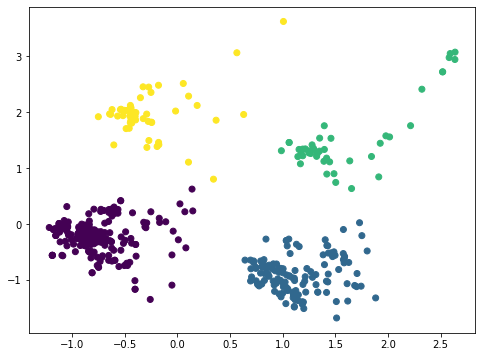

In [20]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float

model = KMeans(n_clusters=4)
model = model.fit(scale(X_pca))       
print(model.labels_)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=model.labels_.astype(float))
plt.show()

In [21]:
import numpy as np
pred_classes=model.labels_ 

for cluster in range(4):
    print('cluster: ', cluster)
    print(dummies.columns[np.where(pred_classes == cluster)])

cluster:  0
Index(['一介', '一座座', '一神教', '三星', '三洲', '上市', '上帝', '上獅', '上薩瓦省', '上鮮',
       ...
       '地中海', '地位', '地具', '地化', '地名', '地域', '地將', '地底', '地形', '地景'],
      dtype='object', length=265)
cluster:  1
Index(['上古', '上古史', '上班族', '世局', '世工殤', '世界', '中南美洲', '中原', '中古', '中古史',
       ...
       '四大洲', '四川', '回京', '國食', '圓型', '圖話', '圭臬', '地應', '地方史', '地方志'],
      dtype='object', length=134)
cluster:  2
Index(['三角洲', '世界屋脊', '中心', '中本', '中縣', '中美洲', '交融', '人事', '人人', '人口', '人口比例',
       '人工智能', '人文', '人面', '仁者', '代金券', '何物', '作深', '使徒', '例子', '儲思', '党爭',
       '入主中原', '入侵者', '全化', '公益', '公眾', '共派', '冰川', '列表', '初名', '南美洲', '印安',
       '印巴', '原作', '原名', '史事', '名作', '君主', '呢喃', '善堂', '回音', '困境', '圈圈', '國帶'],
      dtype='object')
cluster:  3
Index(['一串串', '一流', '七大洲', '七色', '上山下海', '不史', '中文版', '主管', '之口', '之士', '事會',
       '人報', '人性', '人會', '人民', '人父', '人觀', '今人', '代餐', '任期制', '位何會', '位具',
       '先民', '光采', '全彩', '全球化', '全部', '全面性', '八王', '公式', '公民', '共筆', '冰帽',
       '出版社', '分

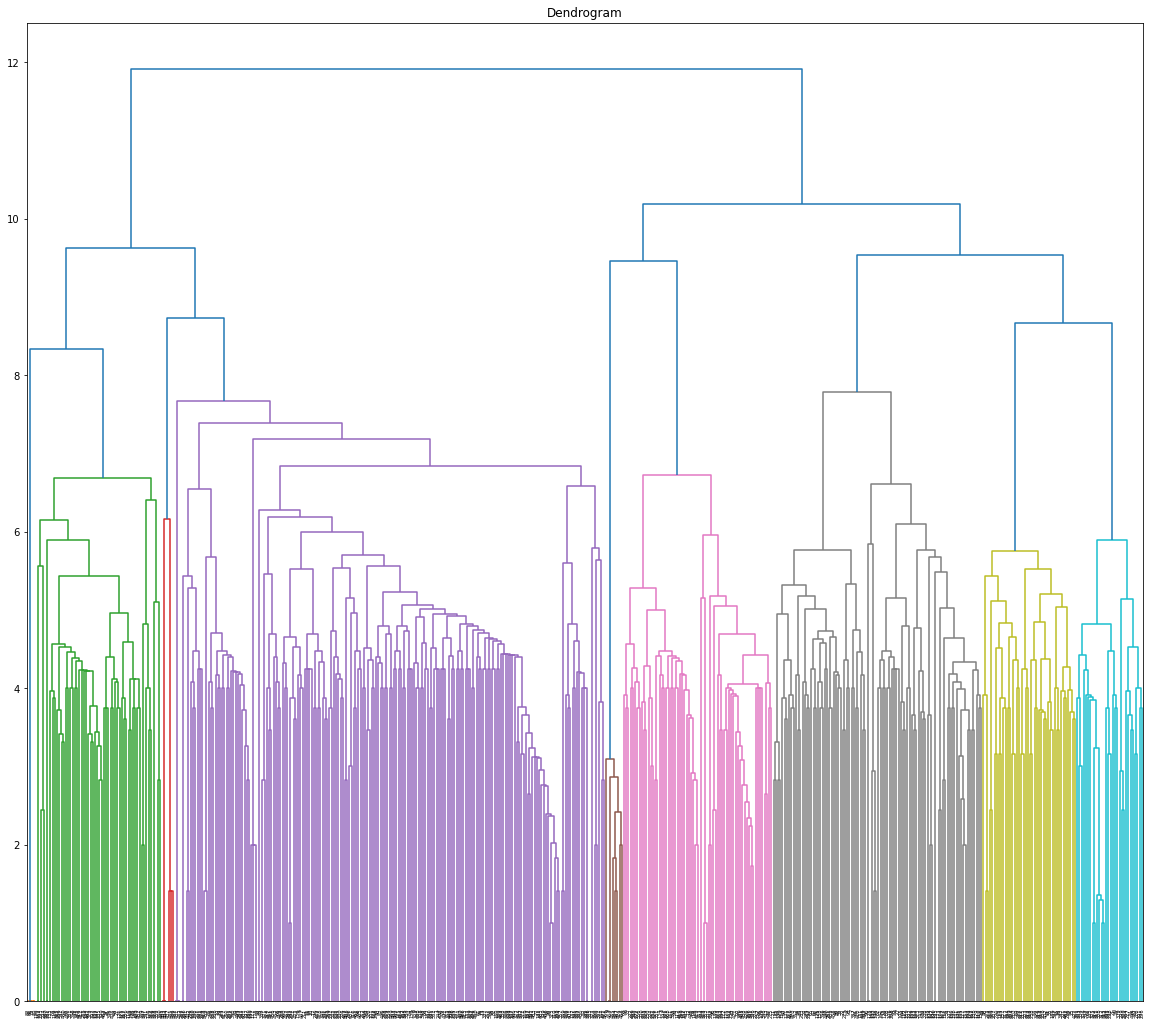

In [22]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(20, 18))
dendogram = sch.dendrogram(sch.linkage(X, method= 'ward', metric = 'euclidean'))
cluster= AgglomerativeClustering(n_clusters  = 5)
cluster.fit(X)
Y_pred_dendrogram = cluster.fit_predict(X)
plt.title('Dendrogram')
plt.show()

In [23]:
# 引入詞性標註介面
import jieba.posseg as psg

text = "一座座"
#詞性標註
seg = psg.cut(text)

#將詞性標註結果打印出來
for ele in seg:
    print(ele)

一座座/n
